In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
import scipy.ndimage as sc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

pd.options.display.max_columns = None

TRAIN = pd.read_csv("../datasources/mnsit/train.csv", delimiter=',') #, skiprows=1)
TRAINEXT = pd.read_csv("../datasources/mnsit/trainextended.csv", delimiter=',') #, skiprows=1)
TEST = pd.read_csv("../datasources/mnsit/test.csv", delimiter=',') #, skiprows=1)
X_TRAIN = TRAINEXT.copy()
X_TEST = TEST.copy()
y = TRAINEXT.label
del X_TRAIN["label"]

# Fonction d'export pour kaggle
def exportKaggle(algo):
    p_test = algo.predict(X_TEST)
    result = pd.DataFrame(X_TEST.index + 1, columns=['ImageId'])
    pred = pd.DataFrame(p_test, columns=['Label'])
    result = result.join(pred)
    fichier = "./data/result_" + str(datetime.datetime.now()).replace(":", "-").replace(" ", "_")
    result.to_csv(fichier, columns=["ImageId", "Label"], index=False)
    
# returns the image in digit (28x28)
# fromIndex = 0 if no labels 1 else
def getImageMatriceDigit(dataset, rowIndex, fromIndex):
    return dataset.iloc[rowIndex, fromIndex:].values.reshape(28,28)

# returns the image matrix in one row
def getImageLineDigit(dataset, rowIndex):
    return dataset[dataset.index == rowIndex]

# display an image defined in the data given (train/test)
def displayImageFromData(data, row):
    imgDigitMatrice = getImageMatriceDigit(data, row)
    displayImage(imgDigitMatrice)

# display an image from the Matrix 28:28
def displayImage(image):
    plt.imshow(image, cmap=matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# convert an image 28:28 in one matrix row
def convertImageInRow(img):
    return pd.DataFrame(img.reshape(1,784), 
                        columns=["pixel" + str(x) for x in range(784)])

# dark or white / wash the pixel
def darkOrWhite(val):
    if (val > 150):
        return 255
    else:
        return 0

def removeNoise(val):
    if (val < 20):
        return 0
    else:
        return val
    
# Clean a global dataset 
def darkOrWhiteDataset(dataset):
    for i in range(dataset.shape[1]):
        dataset['pixel' + str(i)] = [darkOrWhite(x) for x in dataset['pixel' + str(i)]]
        
# Remove noise to the global dataset 
def removeNoiseDataset(dataset):
    for i in range(dataset.shape[1]):
        dataset['pixel' + str(i)] = [removeNoise(x) for x in dataset['pixel' + str(i)]]

# Retravail de l'image

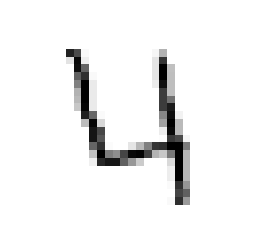

In [8]:
imgSrc = getImageMatriceDigit(X_TRAIN, 15, 0)
displayImage(imgSrc)

In [9]:
removeNoiseDataset(X_TRAIN)

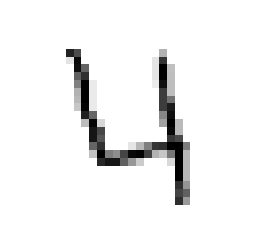

In [10]:
imgSrc = getImageMatriceDigit(X_TRAIN, 15, 0)
displayImage(imgSrc)

In [ ]:
rf = RandomForestClassifier(n_estimators=800, random_state=3, max_features=0.5)
rf.fit(X_TRAIN, y)
print ("Score Train -->", round(rf.score(X_TRAIN, y) *100,2), " %")

In [14]:
exportKaggle(rf)